# Como funciona o NLP

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
import pickle
from yellowbrick.model_selection import FeatureImportances
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
sample_text = "Gemini of Man review: Double Will Smith can't save hackneyed spy flick U.S.A"
from spacy.lang.en import English
import spacy
from sklearn.feature_extraction.text import CountVectorizer
nlp = spacy.load('en_core_web_sm')
#run NLP on input/doc
doc = nlp(sample_text)

## Tokenização 
<img src="https://miro.medium.com/max/1050/0*EKgminT7W-0R4Iae.png" width="300" height="100"/>

In [29]:
print("Token Attributes: \n", "token.text")
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text)

Token Attributes: 
 token.text
Gemini
of
Man
review
:
Double
Will
Smith
ca
n't
save
hackneyed
spy
flick
U.S.A


## Lemanização

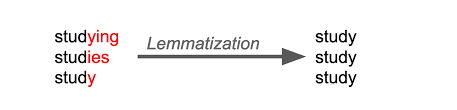


In [30]:
print("Token Attributes: \n", "token.lemma")
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.lemma_)

Token Attributes: 
 token.lemma
Gemini
of
Man
review
:
double
Will
Smith
can
not
save
hackneyed
spy
flick
U.S.A


## Stop Words

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/07/Screenshot-from-2019-07-10-15-06-10.png" width="400" height="100"/>


In [31]:
print(nlp.Defaults.stop_words)

{'any', 'various', 'really', 'than', 'everything', 'again', 'hereupon', 'perhaps', 'my', 'are', 'one', 'whenever', 'due', 'will', 'once', 'ca', 'this', 'about', 'who', 'might', 'get', '‘d', 'anything', 'it', 'move', 'whereby', 'toward', "'d", 'nor', 'only', 'else', 'himself', 'hence', 'mine', 'somewhere', 'so', 'across', 'sixty', 'already', 'around', 'none', 'since', '’d', 'done', 'out', 'within', 'their', 'among', 'over', 'nobody', 'put', 'thus', 'above', 'least', 'empty', 'front', 'namely', 'other', 'ten', 'less', 'without', 'anyone', '’ve', 'nevertheless', 'somehow', 'formerly', 'which', 'thereupon', 'until', 'own', 'now', 'something', 'or', 'here', 'except', 'upon', 'seeming', 'twenty', 'both', 'fifty', 'doing', 'made', 'top', 'few', 'sometimes', 'besides', 'four', 'them', 'such', 'last', 'seems', 'via', 'thru', 'never', 'still', 'show', 'noone', 'have', 'ever', 'some', 'her', 'latter', 'very', 'became', 'hereafter', 'most', 'whereas', 'unless', 'throughout', 'thereby', 'would', 'c

In [32]:
df = pd.read_csv('dataset7.csv', encoding = 'latin1')

In [33]:
df['Sentiment'].drop_duplicates()

0                Neutral
1               Positive
4     Extremely Negative
9               Negative
11    Extremely Positive
Name: Sentiment, dtype: object

In [34]:
df.query('Sentiment != "Extremely Negative"',inplace = True)

In [35]:
df.query('Sentiment != "Extremely Positive"',inplace = True)

## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [36]:
total = df.groupby('Sentiment').agg(n = ('Sentiment','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [37]:
total

,Sentiment,n,perc
0,Negative,9917,34.135344
1,Neutral,7713,26.548947
2,Positive,11422,39.315710


## Separar em target e feature

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img12.png?raw=true" width="300" height="100"/>

In [38]:
X = df['OriginalTweet']
y = df['Sentiment']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# EXEMPLO:
text = """Yesterday I went fishing. I don't fish that often, 
so I didn't catch any fish. I was told I'd enjoy myself, 
but it didn't really seem that fun."""

vectorizer = TfidfVectorizer()

matrix = vectorizer.fit_transform([text])
matrix

<1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [42]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names_out())
counts

,any,but,catch,didn,don,enjoy,fish,fishing,fun,it,myself,often,really,seem,so,that,told,was,went,yesterday
0,0.185695,0.185695,0.185695,0.371391,0.185695,0.185695,0.371391,0.185695,0.185695,0.185695,0.185695,0.185695,0.185695,0.185695,0.185695,0.371391,0.185695,0.185695,0.185695,0.185695


In [43]:
preprocessor = make_pipeline(CountVectorizer(),
                             LinearSVC(dual=False))

In [44]:
preprocessor.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('linearsvc', LinearSVC(dual=False))])

In [45]:
accuracy_score(y_test,preprocessor.predict(X_test))

0.7249687108886108